In [69]:
# Isaac Berez
# 17.01.23
import sys
from scipy.io import mmread
import os
import glob
import pandas as pd
import numpy as np
from pandas_ods_reader import read_ods
from copy import deepcopy
import pprint
import json
import re
from datetime import datetime
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import harmonypy as hm
from matplotlib.cm import ScalarMappable
from datetime import date
import mpld3
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import panel as pn
import bokeh
from bokeh.resources import INLINE

import dimorph_processing as dp
import cell_comparison as cc
import sex_stats as ss

today = str(date.today())
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# This notebook analyzes each cluster of a cell class to determine abundance of 4 groups of interest (male, female, breeder, naive)

# Table of Contents
1. [GABA Analysis](#gaba_analysis)
2. [Vglut1 Analysis](#vglut1_analysis)
3. [Vglut2 Analysis](#vglut2_analysis)
4. [Nonneuronal Analysis](#nn_analysis)

## GABA Analysis <a name="gaba_analysis"></a>

In [21]:
folder = '/bigdata/isaac/gaba_files/'
gaba_meta_data_df_plis_filtered_markers= pd.read_json(folder+'gaba_meta_data_df_plis_filtered_markers_2024-08-25.json')

In [4]:
gaba_meta_data_df_plis_filtered_markers

,TTGCCTGTCGTAGGGA-1_10X35_2,GCAACATAGATCGACG-1_10X51_2,CGAGTGCAGGCAGTCA-1_10X37_2,GTAGATCGTTGACGGA-1_10X51_3,AACCCAAAGAAATGGG-1_10X35_2,TTTACCAAGGGCAACT-1_10X51_1,CAGGGCTGTATCTTCT-1_10X51_1,ATGACCATCGTGAGAG-1_10X51_1,CAACAACAGACATATG-1_10X35_2,GCAGCTGTCCCGTTGT-1_10X52_1,...,GCCAACGAGGAAGTCC-1_10X51_4,ACACGCGAGGTTCCGC-1_10X51_3,ATGGGTTAGACTTCAC-1_10X52_1,TTTGATCCAAGACTGG-1_10X38_2,ACCTACCGTATTTCCT-1_10X52_1,ATCCACCCACCTATCC-1_10X52_1,CTCATTATCATGGCCG-1_10X52_3,CTCAGAACATTGCTTT-1_10X52_3,CTCCTCCTCCCTCTCC-1_10X36_1,ATACTTCCAGCCCACA-1_10X51_2
Serial_Number,64.0,98.0,68.0,99.0,64.0,97.0,97.0,97.0,64.0,101.0,...,100.0,99.0,101.0,70.0,101.0,101.0,103.0,103.0,65.0,98.0
Date_Captured,2019-11-20,05/31/20,2019-11-25,05/31/20,2019-11-20,05/31/20,05/31/20,05/31/20,2019-11-20,05/31/20,...,05/31/20,05/31/20,05/31/20,2019-12-01,05/31/20,05/31/20,05/31/20,05/31/20,2019-11-24,05/31/20
Species,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,...,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm,Mm
Transcriptome,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,...,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10,Mm10
Strain,,C57Bl/6,,C57Bl/6,,C57Bl/6,C57Bl/6,C57Bl/6,,C57Bl/6,...,C57Bl/6,C57Bl/6,C57Bl/6,,C57Bl/6,C57Bl/6,C57Bl/6,C57Bl/6,,C57Bl/6
Project,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,...,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph,Dimorph
Group,Naïve-F,Breeder-F,Naïve-M,Breeder-M,Naïve-F,Breeder-F,Breeder-F,Breeder-F,Naïve-F,Breeder-F,...,Breeder-M,Breeder-M,Breeder-F,Naïve-F,Breeder-F,Breeder-F,Breeder-M,Breeder-M,Naïve-M,Breeder-F
ChipID,10X35,10X51,10X37,10X51,10X35,10X51,10X51,10X51,10X35,10X52,...,10X51,10X51,10X52,10X38,10X52,10X52,10X52,10X52,10X36,10X51
SampleID,10X35_2,10X51_2,10X37_2,10X51_3,10X35_2,10X51_1,10X51_1,10X51_1,10X35_2,10X52_1,...,10X51_4,10X51_3,10X52_1,10X38_2,10X52_1,10X52_1,10X52_3,10X52_3,10X36_1,10X51_2
DonorID,"DI1,DI2",DI-B1-F,"DI4,DI5",DI-B1-M,"DI1,DI2",DI-B1-F,DI-B1-F,DI-B1-F,"DI1,DI2",DI-B3-F,...,DI-B1-M,DI-B1-M,DI-B3-F,DI6,DI-B3-F,DI-B3-F,DI-B3-M,DI-B3-M,DI3,DI-B1-F


In [70]:
gaba_cluster_sex_stats_df = ss.compute_sex_stats(gaba_meta_data_df_plis_filtered_markers)

In [71]:
gaba_cluster_sex_stats_df

,Breeder-F,Breeder-M,Naïve-F,Naïve-M,num_mice
markers,,,,,
9830147E19Rik-Pcdhb22,36.84,5.26,36.84,21.05,5
A730046J19Rik-Tspan9,20.63,10.2,41.04,28.12,6
AF529169-Col6a1,36.25,15.0,25.62,23.12,6
Ankrd63-Upb1,24.44,11.11,31.11,33.33,6
Apoc3-Igfbp6,19.14,29.63,24.38,26.85,6
Brinp1-Gpr101,47.01,11.11,17.95,23.93,6
Brinp3-Arpp21,20.69,27.59,8.62,43.1,6
Calca-D030055H07Rik,32.37,20.86,20.14,26.62,6
Calcr-Gpc3,31.15,23.41,22.89,22.55,6


<IPython.core.display.Javascript object>


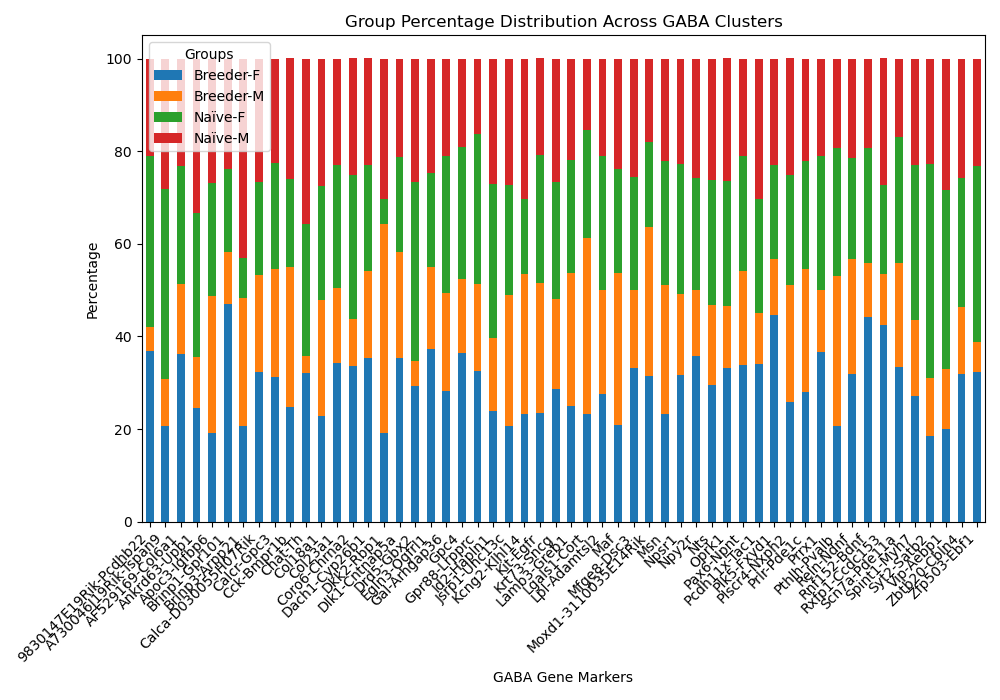

In [73]:
# Assuming your DataFrame is called `df`
gaba_cluster_sex_stats_df_percentage = gaba_cluster_sex_stats_df.drop(columns=['num_mice'])

gaba_cluster_sex_stats_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Group Percentage Distribution Across GABA Clusters')
plt.ylabel('Percentage')
plt.xlabel('GABA Gene Markers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Groups')
plt.tight_layout()
plt.show()